In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [19]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.shape

(569, 33)

# Data preprocessing

In [21]:
df= df.drop(["id","Unnamed: 32"], axis = 1)

# Exploratory Analysis

In [22]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis = 1)

In [23]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of Benign:  357
Number of Malignant :  212


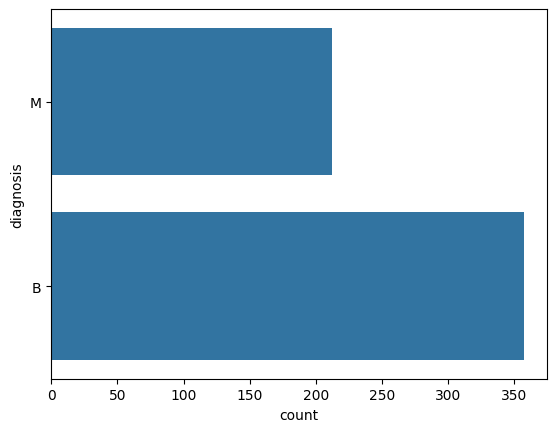

In [24]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

<Axes: xlabel='concavity_mean', ylabel='Density'>

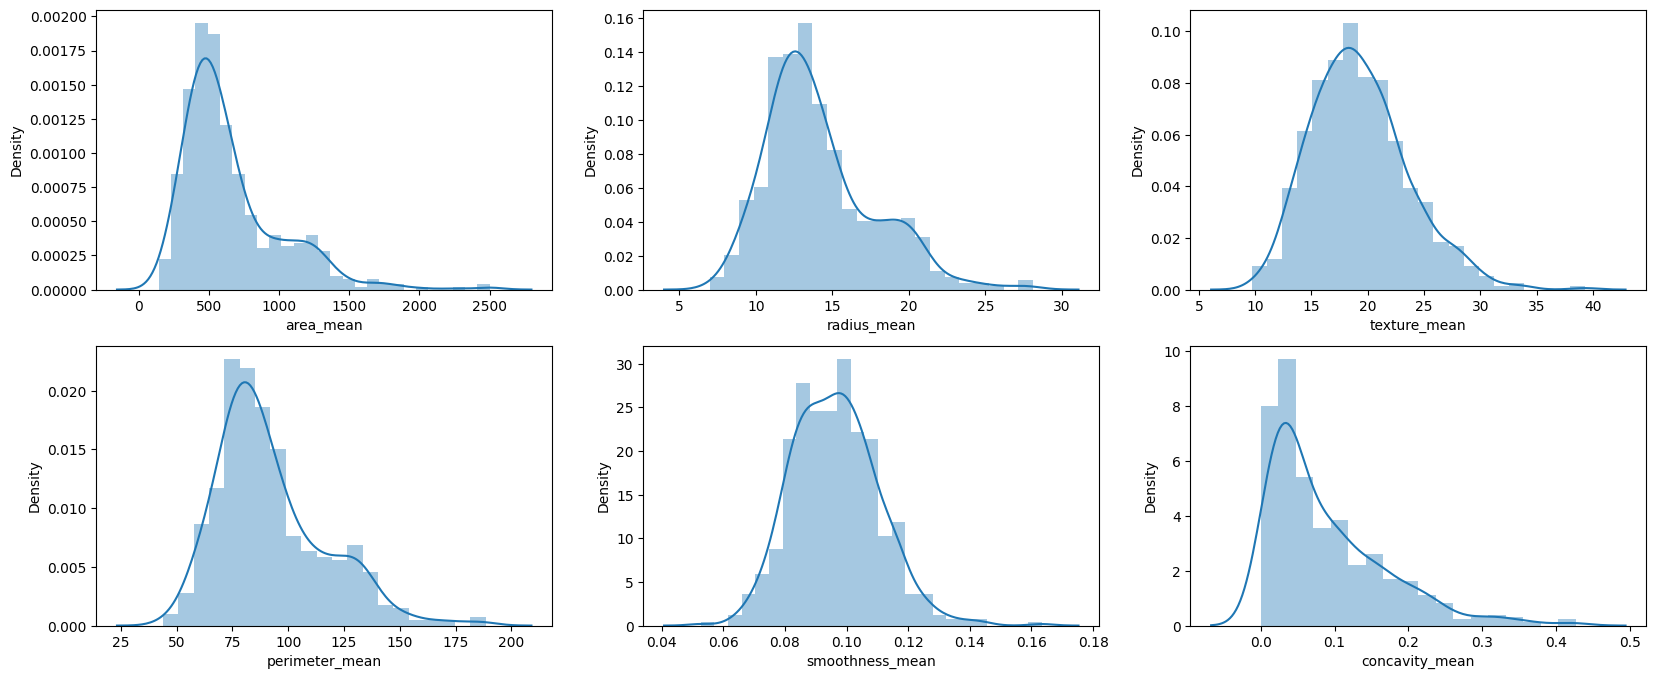

In [25]:
fig ,axes = plt.subplots(2,3,figsize=(20,8))
sns.distplot(df['area_mean'],ax = axes[0,0])
sns.distplot(df['radius_mean'],ax = axes[0,1])
sns.distplot(df['texture_mean'],ax = axes[0,2])
sns.distplot(df['perimeter_mean'],ax = axes[1,0])
sns.distplot(df['smoothness_mean'],ax = axes[1,1])
sns.distplot(df['concavity_mean'],ax = axes[1,2])

<Axes: >

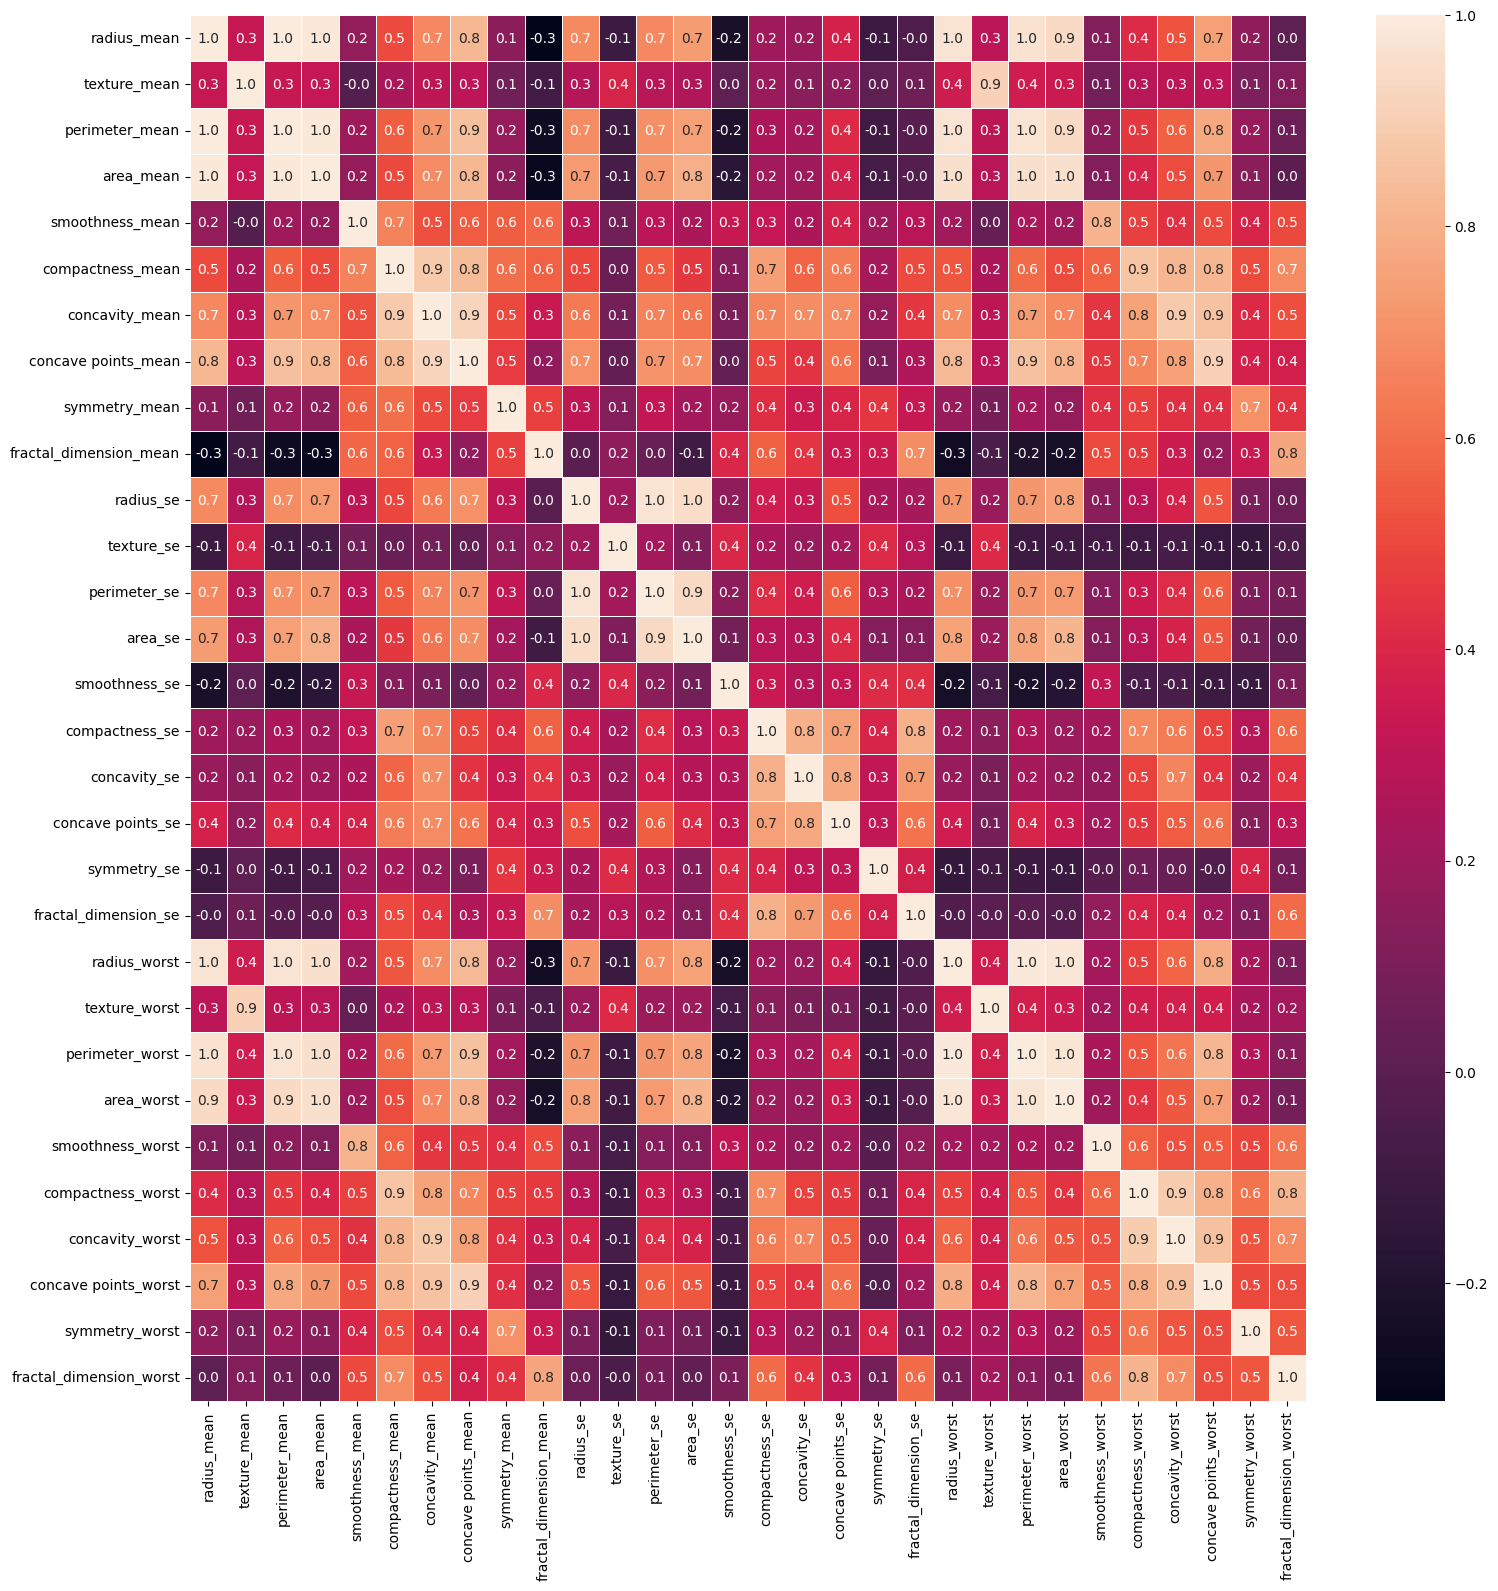

In [26]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Splitting the data

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

# Ensemble techniques and models

In [29]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision tree as base estimator for Bagging and AdaBoost
base_estimator = DecisionTreeClassifier()

# Bagging
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# AdaBoost
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [30]:
bagging_preds = bagging_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)
adaboost_preds = adaboost_model.predict(X_test)


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute precision
bagging_precision = precision_score(y_test, bagging_preds)
random_forest_precision = precision_score(y_test, random_forest_preds)
adaboost_precision = precision_score(y_test, adaboost_preds)

# Compute recall
bagging_recall = recall_score(y_test, bagging_preds)
random_forest_recall = recall_score(y_test, random_forest_preds)
adaboost_recall = recall_score(y_test, adaboost_preds)

# Compute F1-score
bagging_f1 = f1_score(y_test, bagging_preds)
random_forest_f1 = f1_score(y_test, random_forest_preds)
adaboost_f1 = f1_score(y_test, adaboost_preds)

# Compute ROC curve and AUC
bagging_probs = bagging_model.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_model.predict_proba(X_test)[:, 1]
adaboost_probs = adaboost_model.predict_proba(X_test)[:, 1]

bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)

bagging_auc = roc_auc_score(y_test, bagging_probs)
random_forest_auc = roc_auc_score(y_test, random_forest_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)

bagging_accuracy = accuracy_score(y_test, bagging_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)

print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("AdaBoost Accuracy:", adaboost_accuracy)

print("\nBagging Precision:", bagging_precision)
print("Random Forest Precision:", random_forest_precision)
print("AdaBoost Precision:", adaboost_precision)

print("\nBagging Recall:", bagging_recall)
print("Random Forest Recall:", random_forest_recall)
print("AdaBoost Recall:", adaboost_recall)

print("\nBagging F1-score:", bagging_f1)
print("Random Forest F1-score:", random_forest_f1)
print("AdaBoost F1-score:", adaboost_f1)


Bagging Accuracy: 0.951048951048951
Random Forest Accuracy: 0.965034965034965
AdaBoost Accuracy: 0.958041958041958

Bagging Precision: 1.0
Random Forest Precision: 1.0
AdaBoost Precision: 0.9795918367346939

Bagging Recall: 0.8679245283018868
Random Forest Recall: 0.9056603773584906
AdaBoost Recall: 0.9056603773584906

Bagging F1-score: 0.9292929292929293
Random Forest F1-score: 0.9504950495049505
AdaBoost F1-score: 0.9411764705882353


# Result

In [32]:
accuracies = [bagging_accuracy, random_forest_accuracy, adaboost_accuracy]
precisions = [bagging_precision, random_forest_precision, adaboost_precision]
recalls = [bagging_recall, random_forest_recall, adaboost_recall]
f1_scores = [bagging_f1, random_forest_f1, adaboost_f1]

models=["Bagging","Random forest","AdaBoost"]

print("Models \t\t Accuracy \t Precision \t Recall \t f1_score")
for i in range(3):
  print(f"{models[i]} \t {accuracies[i]:.2f} \t\t {precisions[i]:.2f} \t\t {recalls[i]:.2f} \t\t {f1_scores[i]:.2f} ")

Models 		 Accuracy 	 Precision 	 Recall 	 f1_score
Bagging 	 0.95 		 1.00 		 0.87 		 0.93 
Random forest 	 0.97 		 1.00 		 0.91 		 0.95 
AdaBoost 	 0.96 		 0.98 		 0.91 		 0.94 


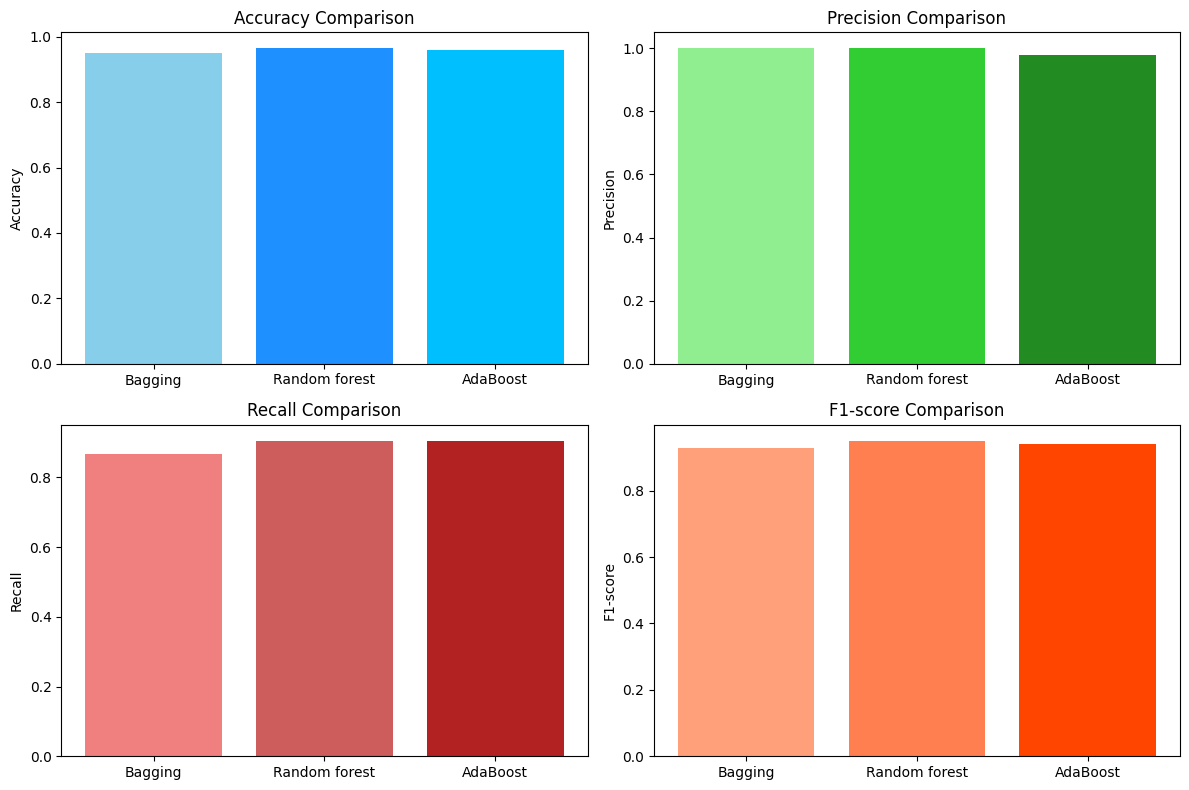

In [33]:
accuracy_colors = ['skyblue', 'dodgerblue', 'deepskyblue']
precision_colors = ['lightgreen', 'limegreen', 'forestgreen']
recall_colors = ['lightcoral', 'indianred', 'firebrick']
f1_score_colors = ['lightsalmon', 'coral', 'orangered']

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color=accuracy_colors)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Precision comparison
plt.subplot(2, 2, 2)
plt.bar(models, precisions, color=precision_colors)
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Recall comparison
plt.subplot(2, 2, 3)
plt.bar(models, recalls, color=recall_colors)
plt.title('Recall Comparison')
plt.ylabel('Recall')

# F1-score comparison
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color=f1_score_colors)
plt.title('F1-score Comparison')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()


# ROC curve

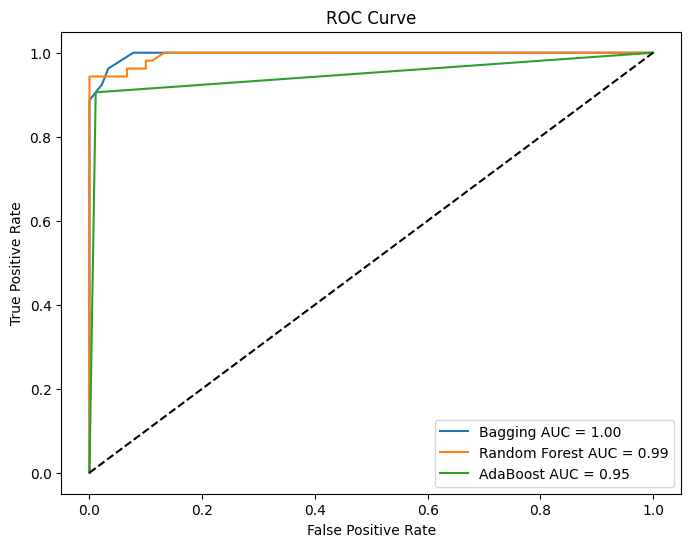

In [34]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(bagging_fpr, bagging_tpr, label=f"Bagging AUC = {bagging_auc:.2f}")
plt.plot(random_forest_fpr, random_forest_tpr, label=f"Random Forest AUC = {random_forest_auc:.2f}")
plt.plot(adaboost_fpr, adaboost_tpr, label=f"AdaBoost AUC = {adaboost_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()